In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
test_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/filtered1_test_data.csv")

In [4]:
train_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/filtered1_train_data.csv")

In [5]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords if not already downloaded
nltk.download('stopwords')

def preprocess_text(text):
    """Cleans text by lowercasing, removing stopwords, and applying stemming."""
    ps = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    # Convert to lowercase
    text = text.lower()

    # Remove non-alphabetic characters (keep spaces)
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize and remove stopwords, apply stemming
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]

    # Join words back into a string
    return " ".join(words)

train_df = train_df.copy()
test_df = test_df.copy()

# ✅ Use .loc to assign new column safely
train_df.loc[:, 'cleaned_text'] = train_df['tweet_text'].apply(preprocess_text)
test_df.loc[:, 'cleaned_text'] = test_df['tweet_text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
train_df

,tweet_text,cyberbullying_type,cleaned_text
0,@Questionnier is dis a joke gay rape or babe rape,cyberbullying,questionni di joke gay rape babe rape
1,@cushen19 so when you get out of school you'll...,not_cyberbullying,cushen get school youll alreadi outdat dejavu
2,The smell of delusion is in the air. Just bc y...,cyberbullying,smell delus air bc feel type way doesnt make t...
3,RT @nickfalkner: I dededeconstructed my tart s...,not_cyberbullying,rt nickfalkn dededeconstruct tart jam lemon co...
4,Oh my god.,not_cyberbullying,oh god
...,...,...,...
12758,@GlobalCalgary Notice how seating of women and...,not_cyberbullying,globalcalgari notic seat women men seper one s...
12759,"as of now, favorite teams on #MKR would have t...",not_cyberbullying,favorit team mkr would eva amp debra amp steve...
12760,females like roseanne barr and those 2 hideous...,cyberbullying,femal like roseann barr hideou bitch call char...
12761,RT @RavenHUWolf: University of #Texas-#Arlingt...,not_cyberbullying,rt ravenhuwolf univers texasarlington muslim s...


In [7]:
label_mapping = {
    "not_cyberbullying": 0,
    "cyberbullying":1,
}


# Apply mapping
train_df["cyberbullying_encoded_type"] = train_df["cyberbullying_type"].map(label_mapping)
test_df["cyberbullying_encoded_type"] = test_df["cyberbullying_type"].map(label_mapping)
X_train, y_train,X_test,y_test= train_df['cleaned_text'], train_df['cyberbullying_encoded_type'],test_df['cleaned_text'], test_df['cyberbullying_encoded_type']


In [8]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
vec1_uni = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
vec2_uni = TfidfVectorizer(ngram_range=(2, 3), lowercase=True)

In [9]:
vec1_train=vec1_uni.fit_transform(X_train)

In [10]:
vec1_test=vec1_uni.transform(X_test)

In [11]:
vec2_train = vec2_uni.fit_transform(X_train)

In [12]:
vec2_test= vec2_uni.transform(X_test) # <-- Changed to .transform()

In [13]:
from scipy.sparse import hstack, csr_matrix

In [14]:
X_train = hstack([vec1_train, vec2_train])

In [15]:
X_test = hstack([vec1_test, vec2_test])

In [16]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [17]:
svm_model_linear = SVC(kernel= 'linear', C = 1).fit(X_train, y_train)

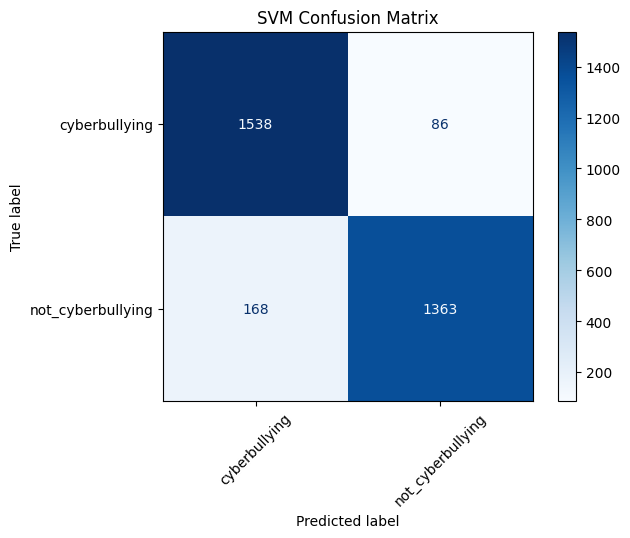

Accuracy: 0.9195

Classification Report:
                   precision    recall  f1-score   support

    cyberbullying       0.90      0.95      0.92      1624
not_cyberbullying       0.94      0.89      0.91      1531

         accuracy                           0.92      3155
        macro avg       0.92      0.92      0.92      3155
     weighted avg       0.92      0.92      0.92      3155



In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions
svm_predictions = svm_model_linear.predict(X_test)

# --- 1️⃣ Confusion Matrix ---
cm = confusion_matrix(y_test, svm_predictions)
labels = ["cyberbullying", "not_cyberbullying"]

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("SVM Confusion Matrix")
plt.show()

# --- 2️⃣ Evaluation Metrics ---
accuracy = accuracy_score(y_test, svm_predictions)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, svm_predictions, target_names=labels))

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

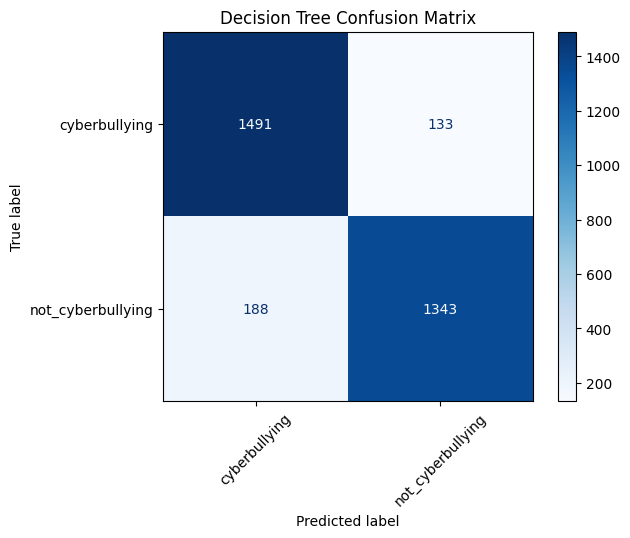

Accuracy: 0.8983

Classification Report:
                   precision    recall  f1-score   support

    cyberbullying       0.90      0.95      0.92      1624
not_cyberbullying       0.94      0.89      0.91      1531

         accuracy                           0.92      3155
        macro avg       0.92      0.92      0.92      3155
     weighted avg       0.92      0.92      0.92      3155



In [21]:
cm = confusion_matrix(y_test, dt_predictions)
labels = ["cyberbullying", "not_cyberbullying"]

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Decision Tree Confusion Matrix")
plt.show()

# --- 2️⃣ Evaluation Metrics ---
accuracy = accuracy_score(y_test, dt_predictions)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, svm_predictions, target_names=labels))

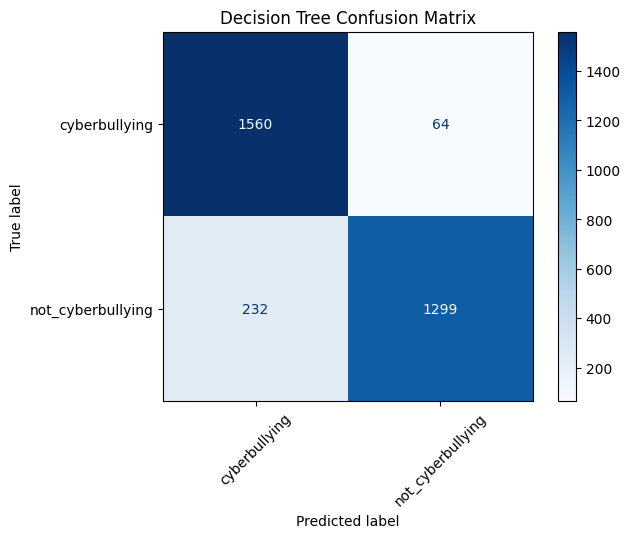

Accuracy: 0.9062

Classification Report:
                   precision    recall  f1-score   support

    cyberbullying       0.87      0.96      0.91      1624
not_cyberbullying       0.95      0.85      0.90      1531

         accuracy                           0.91      3155
        macro avg       0.91      0.90      0.91      3155
     weighted avg       0.91      0.91      0.91      3155



In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
cm = confusion_matrix(y_test, rf_predictions)
labels = ["cyberbullying", "not_cyberbullying"]

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Decision Tree Confusion Matrix")
plt.show()

# --- 2️⃣ Evaluation Metrics ---
accuracy = accuracy_score(y_test, rf_predictions)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, rf_predictions, target_names=labels))